In [1]:
# Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv('Copper_Set.xlsx - Result 1.csv')
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
# checking for null values
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [4]:
#changing the datatypes
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [5]:
# material_ref has large set of null values, so replacing them with unknown
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values 
df = df.dropna()

In [6]:
df1=df.copy()

In [7]:
# removing values less than 0
a= df1['selling_price'] <= 0
print(a.sum())
df1.loc[a, 'selling_price'] = np.nan

b = df1['quantity tons'] <= 0
print(b.sum())
df1.loc[b, 'quantity tons'] = np.nan

c= df1['thickness'] <= 0
print(c.sum())

7
4
0


In [8]:
df1=df1.dropna()

In [9]:
df1.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

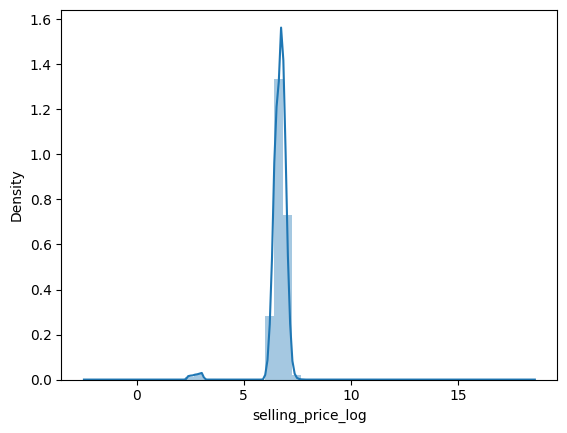

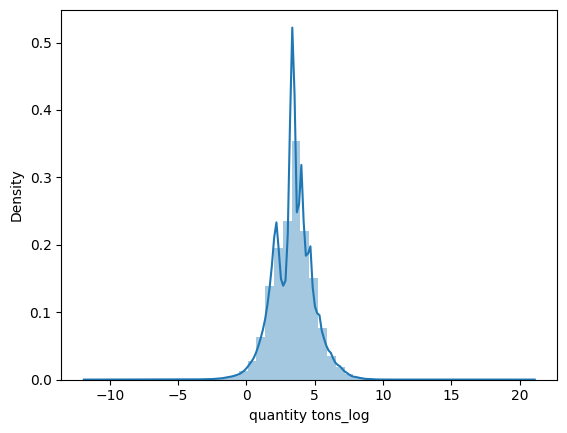

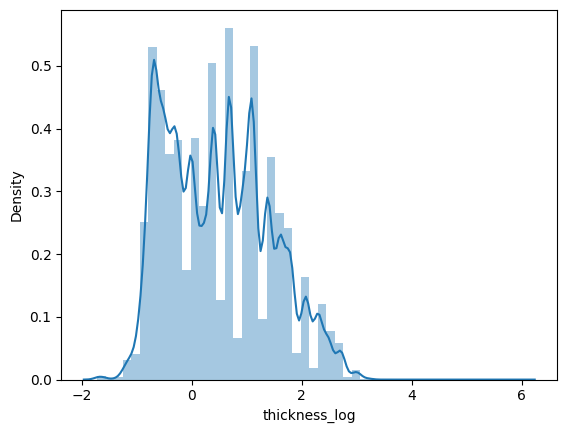

In [10]:
#Taking the log of data to obtain normal distribution 
df1['selling_price_log'] = np.log(df1['selling_price'])
sns.distplot(df1['selling_price_log'])
plt.show()

df1['quantity tons_log'] = np.log(df1['quantity tons'])
sns.distplot(df1['quantity tons_log'])
plt.show()

df1['thickness_log'] = np.log(df1['thickness'])
sns.distplot(df1['thickness_log'])
plt.show()

In [ ]:
#decision tree regressor

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X=df1[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']


# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()


# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)


# splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [12]:
# evalution metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)  #lower the value to 0 the model is good
print("Mean absolute error:",mae)  
print('R-squared:', r2)    #close to 1 the model is good

Mean squared error: 0.02914927952838302
Mean absolute error: 0.1297354023371051
R-squared: 0.9075761443109392


In [14]:
# predicting selling price
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price is :', np.exp(new_pred))

Predicted selling price is : [618.76384509]


In [15]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [19]:
df2=df1[df1['status'].isin(['Won', 'Lost'])]
len(df2)

150427

In [ ]:
#DECISION TREE CLASSIFIER

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df2['status']
X= df2[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)

# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)


# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


Accuracy: 0.9113541181945091
f1 score: 0.9421788617886179
Confusion Matrix:
[[ 5690  1312]
 [ 1355 21729]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



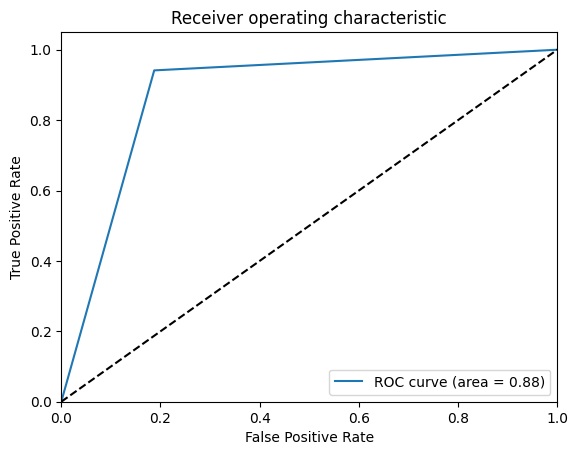

In [21]:
# evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_test, y_pred)
print(f"f1 score: {f1}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
     

In [22]:
# Predict the status for a new sample
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [23]:
# Saving the model
import pickle
with open('clsmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
import streamlit as st
import re
from streamlit_option_menu import option_menu

st.set_page_config(layout="wide")

st.write("""
<div style='text-align:center'>
    <h1 style='color:#009919;'>Industrial Copper Modeling Application</h1>
</div>
""", unsafe_allow_html=True)
st.markdown("### :red[Domain :] Manufacturing")
st.markdown("### :red[Technologies used :]  Python, Data Pre-processing, EDA and Streamlit")
st.markdown("### :red[Overview :] In this streamlit web app i have created a lead classification model where the system evaluates and classifies leads based on how likely they are to become a customer")
        
    
tab1, tab2 = st.tabs(["PREDICT SELLING PRICE", "PREDICT STATUS"])
with tab1:
    # Define the possible values for the dropdown menus
    status_options = ['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered',
                      'Offerable']
    item_type_options = ['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
    country_options = [28., 25., 30., 32., 38., 78., 27., 77., 113., 79., 26., 39., 40., 84., 80., 107., 89.]
    application_options = [10., 41., 28., 59., 15., 4., 38., 56., 42., 26., 27., 19., 20., 66., 29., 22., 40., 25., 67.,
                           79., 3., 99., 2., 5., 39., 69., 70., 65., 58., 68.]
    product = ['611112', '611728', '628112', '628117', '628377', '640400', '640405', '640665',
               '611993', '929423819', '1282007633', '1332077137', '164141591', '164336407',
               '164337175', '1665572032', '1665572374', '1665584320', '1665584642', '1665584662',
               '1668701376', '1668701698', '1668701718', '1668701725', '1670798778', '1671863738',
               '1671876026', '1690738206', '1690738219', '1693867550', '1693867563', '1721130331', '1722207579']

    # Define the widgets for user input
    with st.form("my_form"):
        col1, col2, col3 = st.columns([5, 2, 5])
        with col1:
            st.write(' ')
            status = st.selectbox("Status", status_options, key=1)
            item_type = st.selectbox("Item Type", item_type_options, key=2)
            country = st.selectbox("Country", sorted(country_options), key=3)
            application = st.selectbox("Application", sorted(application_options), key=4)
            product_ref = st.selectbox("Product Reference", product, key=5)
        with col3:
            st.write(
                f'<h5 style="color:#2e46cc;">NOTE: Min & Max given for reference, you can enter any value</h5>',
                unsafe_allow_html=True)
            quantity_tons = st.text_input("Enter Quantity Tons (Min:611728 & Max:1722207579)")
            thickness = st.text_input("Enter thickness (Min:0.18 & Max:400)")
            width = st.text_input("Enter width (Min:1, Max:2990)")
            customer = st.text_input("customer ID (Min:12458, Max:30408185)")
            submit_button = st.form_submit_button(label="PREDICT SELLING PRICE")
            st.markdown("""
                    <style>
                    div.stButton > button:first-child {
                        background-color: #009999;
                        color: white;
                        width: 100%;
                    }
                    </style>
                """, unsafe_allow_html=True)

        flag = 0
        pattern = "^(?:\d+|\d*\.\d+)$"
        for i in [quantity_tons, thickness, width, customer]:
            if re.match(pattern, i):
                pass
            else:
                flag = 1
                break

    if submit_button and flag == 1:
        if len(i) == 0:
            st.write("please enter a valid number space not allowed")
        else:
            st.write("You have entered an invalid value: ", i)

    if submit_button and flag == 0:
        import pickle

        with open(r"C:\Users\goutham\Desktop\guvi projects\copper project\model.pkl", 'rb') as file:
            loaded_model = pickle.load(file)
        with open( r'C:\Users\goutham\Desktop\guvi projects\copper project\scaler.pkl', 'rb') as f:
            scaler_loaded = pickle.load(f)

        with open(r'C:\Users\goutham\Desktop\guvi projects\copper project\t.pkl', 'rb') as f:
            t_loaded = pickle.load(f)

        with open(r'C:\Users\goutham\Desktop\guvi projects\copper project\s.pkl', 'rb') as f:
            s_loaded = pickle.load(f)

        new_sample = np.array([[np.log(float(quantity_tons)), application, np.log(float(thickness)), float(width),
                                country, float(customer), int(product_ref), item_type, status]])
        new_sample_ohe = t_loaded.transform(new_sample[:, [7]]).toarray()
        new_sample_be = s_loaded.transform(new_sample[:, [8]]).toarray()
        new_sample = np.concatenate((new_sample[:, [0, 1, 2, 3, 4, 5, 6, ]], new_sample_ohe, new_sample_be), axis=1)
        new_sample1 = scaler_loaded.transform(new_sample)
        new_pred = loaded_model.predict(new_sample1)[0]
        st.write('## :green[Predicted selling price:] ', np.exp(new_pred))

with tab2:
    with st.form("my_form1"):
        col1, col2, col3 = st.columns([5, 1, 5])
        with col1:
            cquantity_tons = st.text_input("Enter Quantity Tons (Min:611728 & Max:1722207579)")
            cthickness = st.text_input("Enter thickness (Min:0.18 & Max:400)")
            cwidth = st.text_input("Enter width (Min:1, Max:2990)")
            ccustomer = st.text_input("customer ID (Min:12458, Max:30408185)")
            cselling = st.text_input("Selling Price (Min:1, Max:100001015)")

        with col3:
            st.write(' ')
            citem_type = st.selectbox("Item Type", item_type_options, key=21)
            ccountry = st.selectbox("Country", sorted(country_options), key=31)
            capplication = st.selectbox("Application", sorted(application_options), key=41)
            cproduct_ref = st.selectbox("Product Reference", product, key=51)
            csubmit_button = st.form_submit_button(label="PREDICT STATUS")

        cflag = 0
        pattern = "^(?:\d+|\d*\.\d+)$"
        for k in [cquantity_tons, cthickness, cwidth, ccustomer, cselling]:
            if re.match(pattern, k):
                pass
            else:
                cflag = 1
                break

    if csubmit_button and cflag == 1:
        if len(k) == 0:
            st.write("please enter a valid number space not allowed")
        else:
            st.write("You have entered an invalid value: ", k)

    if csubmit_button and cflag == 0:
        import pickle

        with open(r'C:\Users\goutham\Desktop\guvi projects\copper project\clsmodel.pkl', 'rb') as file:
            cloaded_model = pickle.load(file)

        with open( r'C:\Users\goutham\Desktop\guvi projects\copper project\cscaler.pkl', 'rb') as f:
            cscaler_loaded = pickle.load(f)

        with open(r'C:\Users\goutham\Desktop\guvi projects\copper project\ct.pkl', 'rb') as f:
            ct_loaded = pickle.load(f)

        # Predict the status for a new sample
        # 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
        new_sample = np.array([[np.log(float(cquantity_tons)), np.log(float(cselling)), capplication,
                                np.log(float(cthickness)), float(cwidth), ccountry, int(ccustomer), int(product_ref),
                                citem_type]])
        new_sample_ohe = ct_loaded.transform(new_sample[:, [8]]).toarray()
        new_sample = np.concatenate((new_sample[:, [0, 1, 2, 3, 4, 5, 6, 7]], new_sample_ohe), axis=1)
        new_sample = cscaler_loaded.transform(new_sample)
        new_pred = cloaded_model.predict(new_sample)
        if new_pred == 1:
            st.write('## :green[The Status is Won] ')
        else:
            st.write('## :red[The status is Lost] ')       

